# Методы анализа и обработки изображения

---

ЛР4 - Математическая морфология / работа с шумом изображения

Студентка гр. РИМ-181226

Бабайлова Маргарита Леонидовна

In [42]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_int, img_as_ubyte
from skimage.color import rgb2gray
from numpy import dstack, roll, clip, hstack
from numpy import histogram
import numpy as np
from skimage.morphology import closing, opening, binary_closing, binary_opening, binary_erosion, binary_dilation,erosion, dilation
import matplotlib.pyplot as plt
from skimage.filters import rank
import io
from itertools import groupby

%matplotlib inline

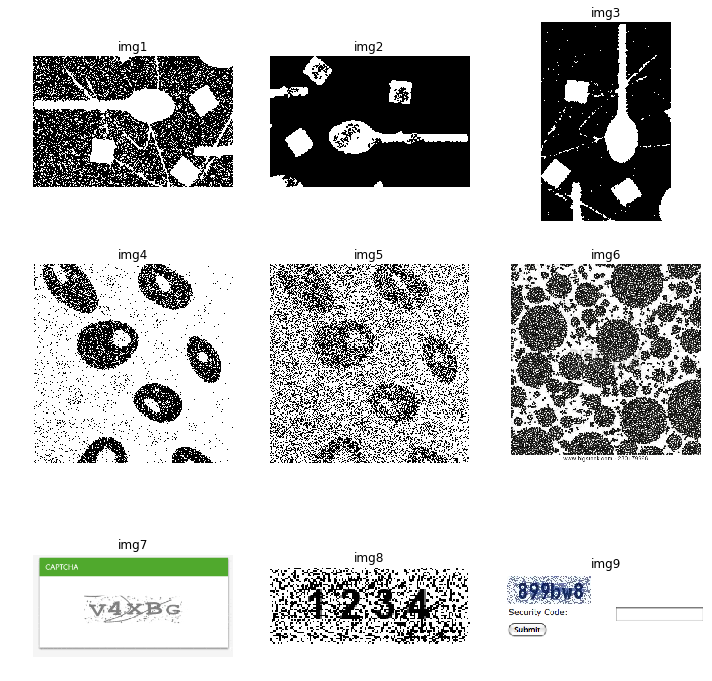

In [43]:
fig = plt.figure(figsize=(10, 10))
img1 = imread('1.png')
fig.add_subplot(3, 3, 1)
plt.axis('off')
imshow(img1)
plt.title('img1')
img2 = imread('2.png')
fig.add_subplot(3, 3, 2)
plt.axis('off')
imshow(img2)
plt.title('img2')
img3 = imread('3.png')
fig.add_subplot(3, 3, 3)
plt.axis('off')
imshow(img3)
plt.title('img3')
img4 = imread('4.png')
fig.add_subplot(3, 3, 4)
plt.axis('off')
imshow(img4)
plt.title('img4')
img5 = imread('5.png')
fig.add_subplot(3, 3, 5)
plt.axis('off')
imshow(img5)
plt.title('img5')
img6 = imread('6.jpg')
fig.add_subplot(3, 3, 6)
plt.axis('off')
imshow(img6)
plt.title('img6')
img7 = imread('7.png')
fig.add_subplot(3, 3, 7)
plt.axis('off')
imshow(img7)
plt.title('img7')
img8 = imread('8.png')
fig.add_subplot(3, 3, 8)
plt.axis('off')
imshow(img8)
plt.title('img8')
img9 = imread('9.png')
fig.add_subplot(3, 3, 9)
plt.axis('off')
imshow(img9)
plt.title('img9')
plt.show()

Найти внутренние и внешние границы изображений 1 – 3, шум удалить.

In [44]:
def calculate_error(img, selem=False, mode='erosion'):
    if mode == 'erosion':
        img_er_bin = binary_erosion(img, selem=np.ones(selem)) if selem else binary_erosion(img)
    elif mode == 'dilation':
        img_er_bin = binary_dilation(img, selem=np.ones(selem)) if selem else binary_dilation(img)
    elif mode == 'closing':
        img_er_bin = binary_closing(img, selem=np.ones(selem)) if selem else binary_closing(img)
    elif mode == 'opening':
        img_er_bin = binary_opening(img, selem=np.ones(selem)) if selem else binary_opening(img)
    img_er = np.ones(img_er_bin.shape)
    return img_er*img_er_bin

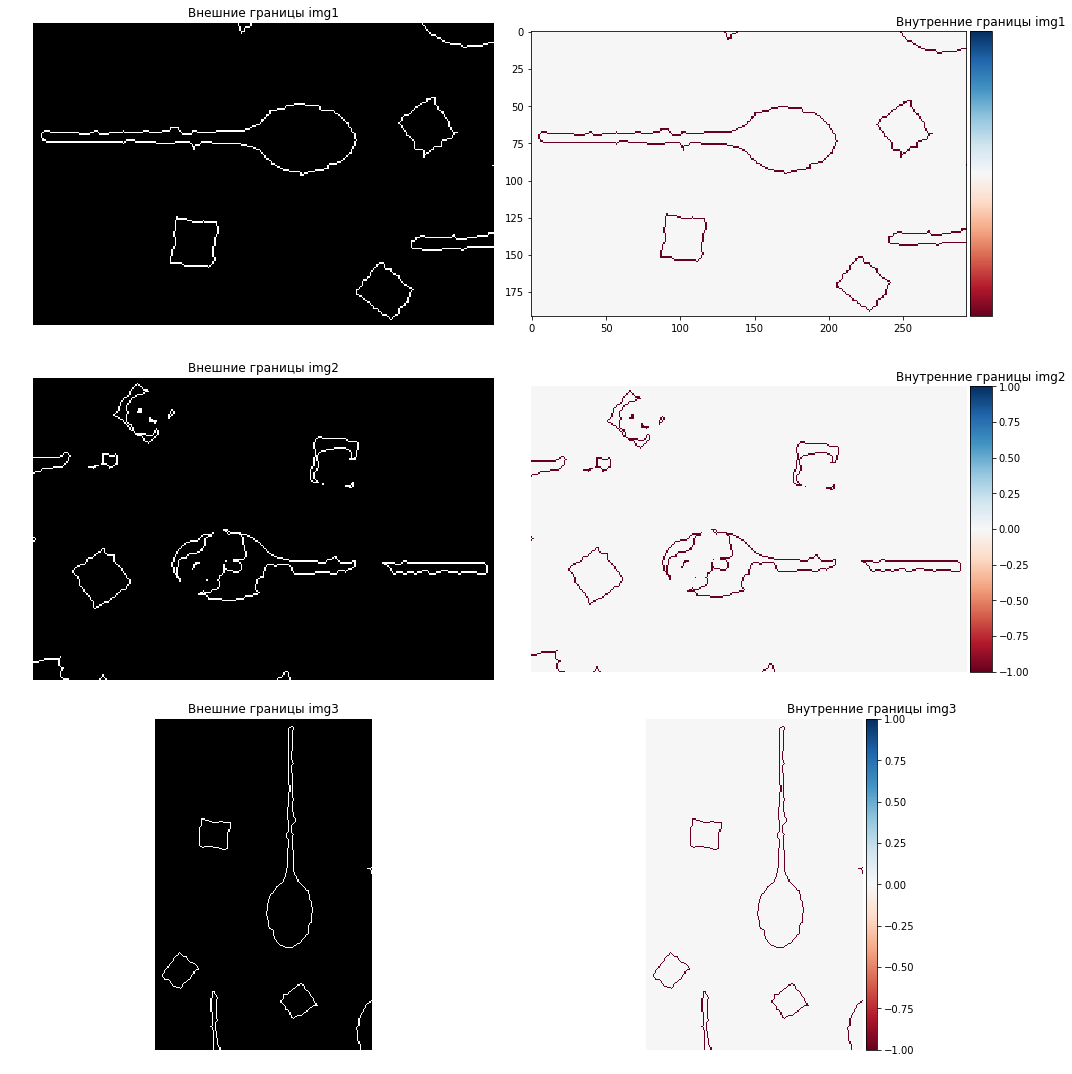

In [45]:
img1_er = calculate_error(rgb2gray(img1), (6,6))
img1_er_er = calculate_error(img1_er)
img2_er = calculate_error(rgb2gray(img2), (4,4))
img2_er_er = calculate_error(img2_er)
img3_er = calculate_error(rgb2gray(img3), (7,7))
img3_er_er = calculate_error(img3_er)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(3, 2, 1)
plt.axis('off')
imshow(img1_er-img1_er_er)
plt.title('Внешние границы img1')
fig.add_subplot(3, 2, 2)
imshow(img1_er_er-img1_er)
plt.axis('off')
plt.title('Внутренние границы img1')
fig.add_subplot(3, 2, 3)
plt.axis('off')
imshow(img2_er-img2_er_er)
plt.title('Внешние границы img2')
fig.add_subplot(3, 2, 4)
plt.axis('off')
imshow(img2_er_er-img2_er)
plt.title('Внутренние границы img2')
fig.add_subplot(3, 2, 5)
plt.axis('off')
imshow(img3_er-img3_er_er)
plt.title('Внешние границы img3')
fig.add_subplot(3, 2, 6)
plt.axis('off')
imshow(img3_er_er-img3_er)
plt.title('Внутренние границы img3')
plt.show()

Удалить шум с 4-6 изображений.

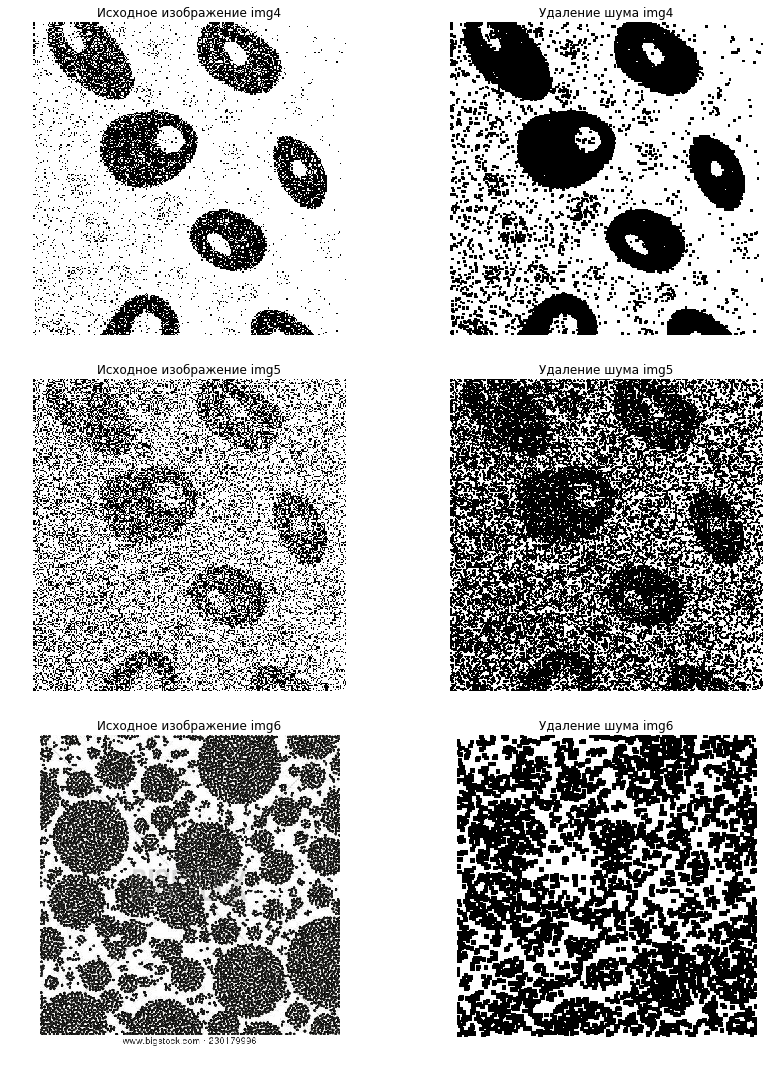

In [46]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(3, 2, 1)
plt.axis('off')
imshow(img4)
plt.title('Исходное изображение img4')
fig.add_subplot(3, 2, 2)
plt.axis('off')
imshow(calculate_error(rgb2gray(img4), (4,4)))
plt.title('Удаление шума img4')
fig.add_subplot(3, 2, 3)
plt.axis('off')
imshow(img5)
plt.title('Исходное изображение img5')
fig.add_subplot(3, 2, 4)
plt.axis('off')
imshow(calculate_error(rgb2gray(img5)))
plt.title('Удаление шума img5')
fig.add_subplot(3, 2, 5)
plt.axis('off')
imshow(img6)
plt.title('Исходное изображение img6')
fig.add_subplot(3, 2, 6)
plt.axis('off')
imshow(calculate_error(rgb2gray(img6), (7,7)))
plt.title('Удаление шума img6')
plt.show()

Убрать шум с капч 7-9.

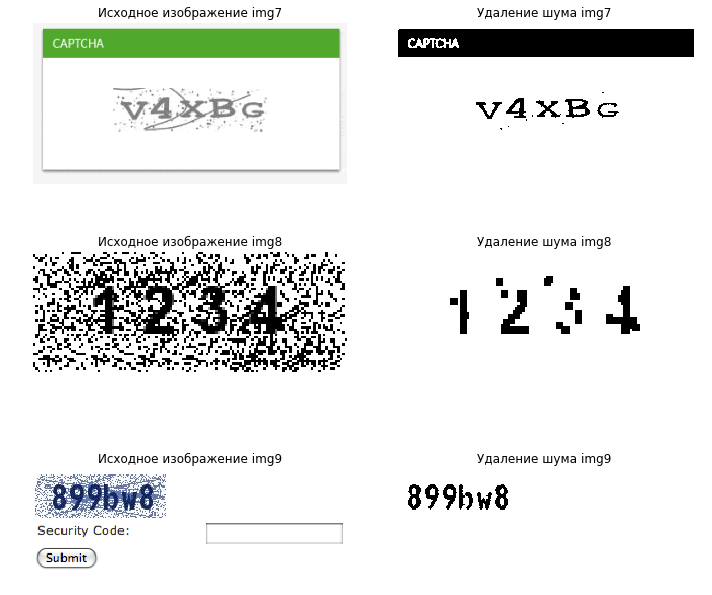

In [47]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 2, 1)
plt.axis('off')
imshow(img7)
plt.title('Исходное изображение img7')
fig.add_subplot(3, 2, 2)
plt.axis('off')
imshow(calculate_error(rgb2gray(img7)>0.6, mode='closing'))
plt.title('Удаление шума img7')
fig.add_subplot(3, 2, 3)
plt.axis('off')
imshow(img8)
plt.title('Исходное изображение img8')
fig.add_subplot(3, 2, 4)
plt.axis('off')
imshow(calculate_error(rgb2gray(img8), (3,3), mode='closing'))
plt.title('Удаление шума img8')
fig.add_subplot(3, 2, 5)
plt.axis('off')
imshow(img9)
plt.title('Исходное изображение img9')
fig.add_subplot(3, 2, 6)
plt.axis('off')
imshow(calculate_error(rgb2gray(img9)>0.3, mode='closing'))
plt.title('Удаление шума img9')
plt.show()

Определение возраста дерева по спилу ствола

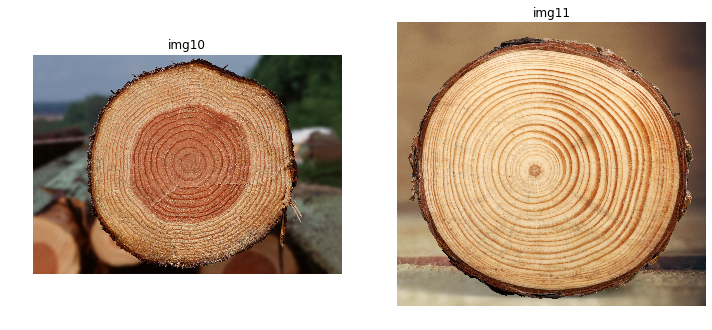

In [48]:
fig = plt.figure(figsize=(10, 10))
img10 = imread('10.jpg')
fig.add_subplot(2, 2, 1)
plt.axis('off')
imshow(img10)
plt.title('img10')
img11 = imread('11.jpg')
fig.add_subplot(2, 2, 2)
plt.axis('off')
imshow(img11)
plt.title('img11')
plt.show()

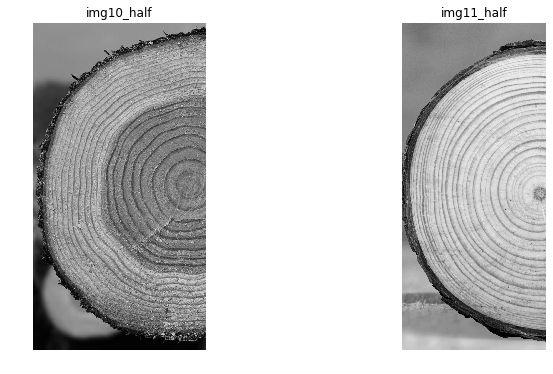

In [49]:
fig = plt.figure(figsize=(10, 10))
img10_half = rgb2gray(img10[:, 200:650])
fig.add_subplot(2, 2, 1)
plt.axis('off')
imshow(img10_half)
plt.title('img10_half')
img11_half = rgb2gray(img11[:, 205:1600])
fig.add_subplot(2, 2, 2)
plt.axis('off')
imshow(img11_half)
plt.title('img11_half')
plt.show()

Возраст дерева img10 = :  21


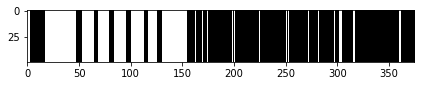

Возраст дерева img11 = :  30


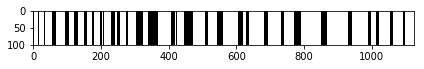

In [50]:
img = img10_half[410:440, 25:400]

img = binary_erosion(\
       np.array([\
        np.mean(\
         binary_erosion(\
          binary_dilation(img>=0.7, square(4))\
                        , square(4))\
                , axis = 0)]*50)\
                      ,square(1))

imshow(img)

grouped_img = np.array([[i, len(list(g))] for i, g in \
                   groupby(~img[0], key = lambda key: key) if i == 1])

print("Возраст дерева img10 = : ", len(grouped_img)-1)
plt.show()
img = img11_half[1600:1625, 75:1200]

img = binary_erosion(\
             np.array(\
              [np.mean(\
                binary_dilation(\
                  rank.equalize(\
                   img, square(30))>=175)\
                , axis = 0)]*100), square(1))

imshow(img)

grouped_img = np.array([[i, len(list(g))] for i, g in \
                   groupby(~img[0], key = lambda key: key) if i == 1])

print("Возраст дерева img11 = : ", len(grouped_img)-1)